In [115]:
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [116]:
#Import the LHC data using pickle.
signal_low_file = open("Lab_5_Data/higgs_100000_pt_250_500.pkl", "rb")
signal_low_dict = pickle.load(signal_low_file)

background_low_file = open("Lab_5_Data/qcd_100000_pt_250_500.pkl", "rb")
background_low_dict = pickle.load(background_low_file)

signal_high_file = open("Lab_5_Data/higgs_100000_pt_1000_1200.pkl", "rb")
signal_high_dict = pickle.load(signal_high_file)

background_high_file = open("Lab_5_Data/qcd_100000_pt_1000_1200.pkl", "rb")
background_high_dict = pickle.load(background_high_file)

#Store all our data together for easy access.
# data = [[signal_low_file, background_low_file], [signal_high_file, background_high_file]]
columns = background_low_dict.keys()
print(columns)

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


# Part 2.1 - LHC Plots and Writeup

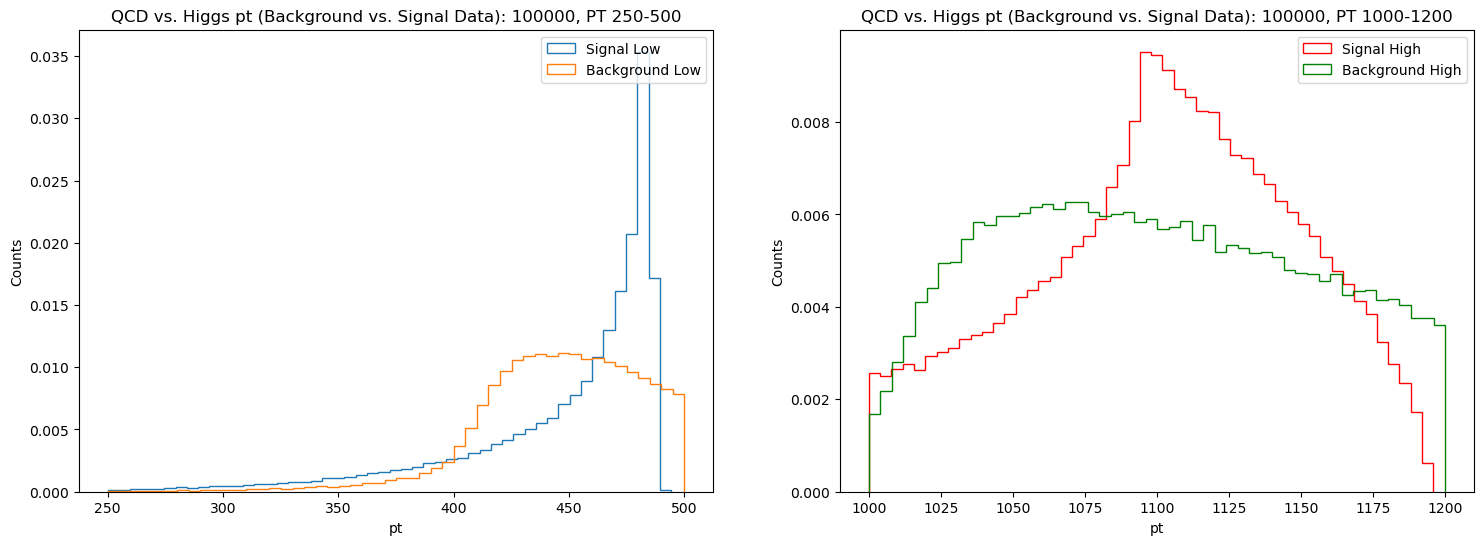

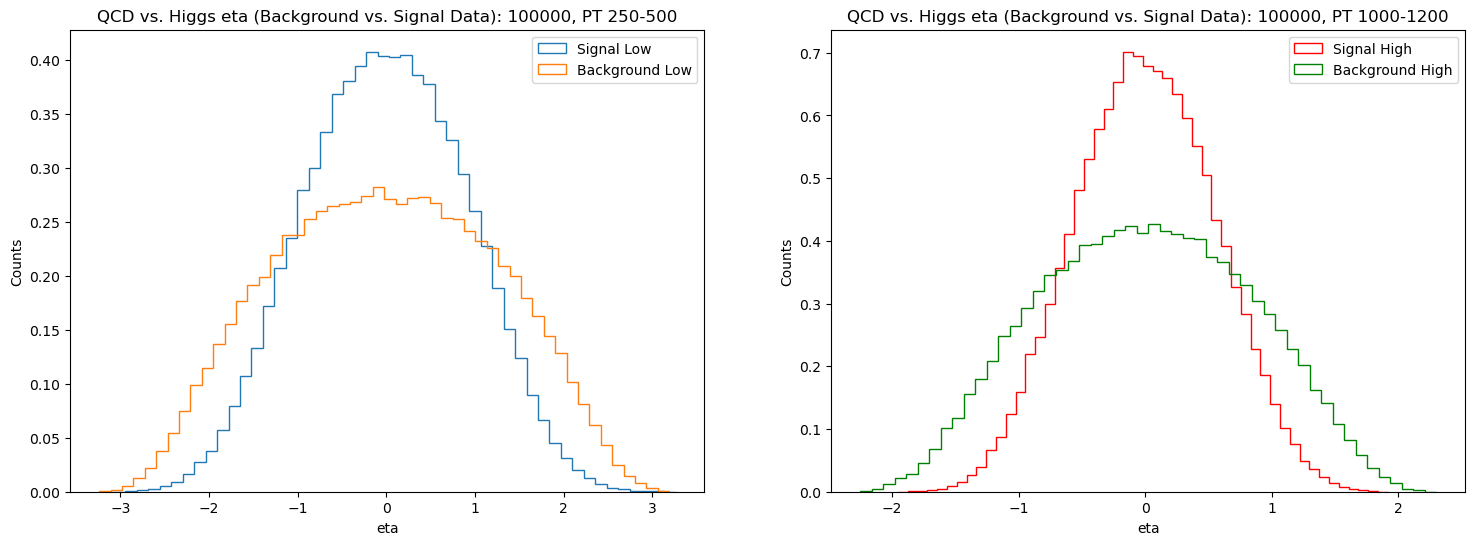

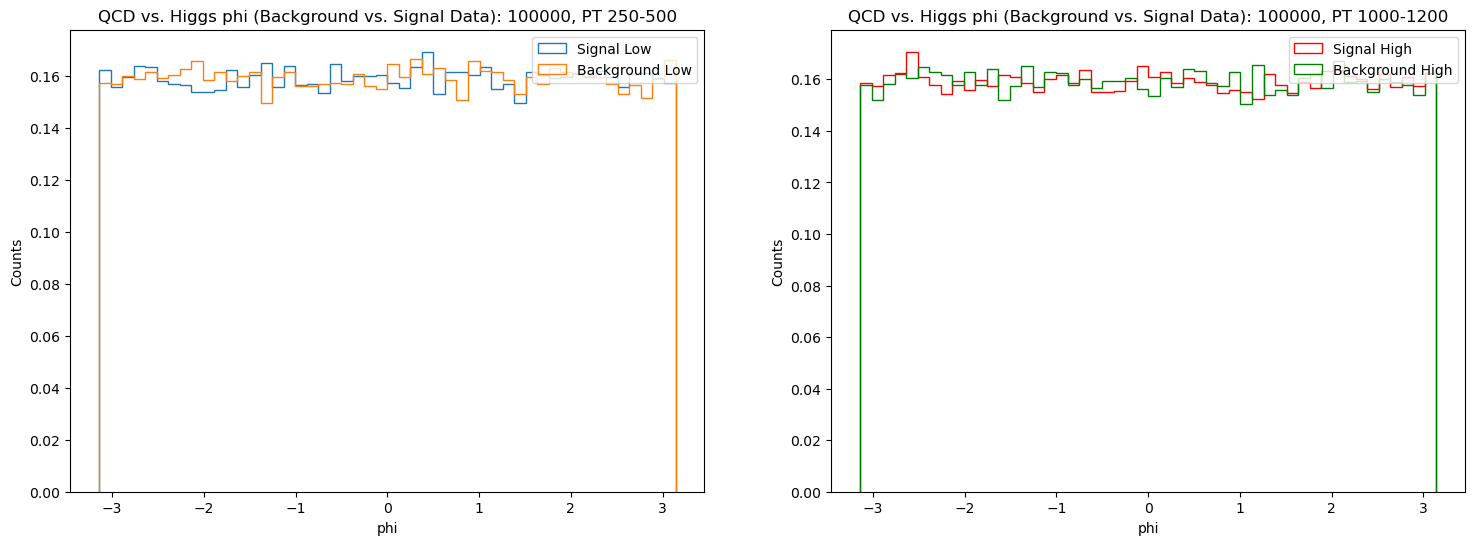

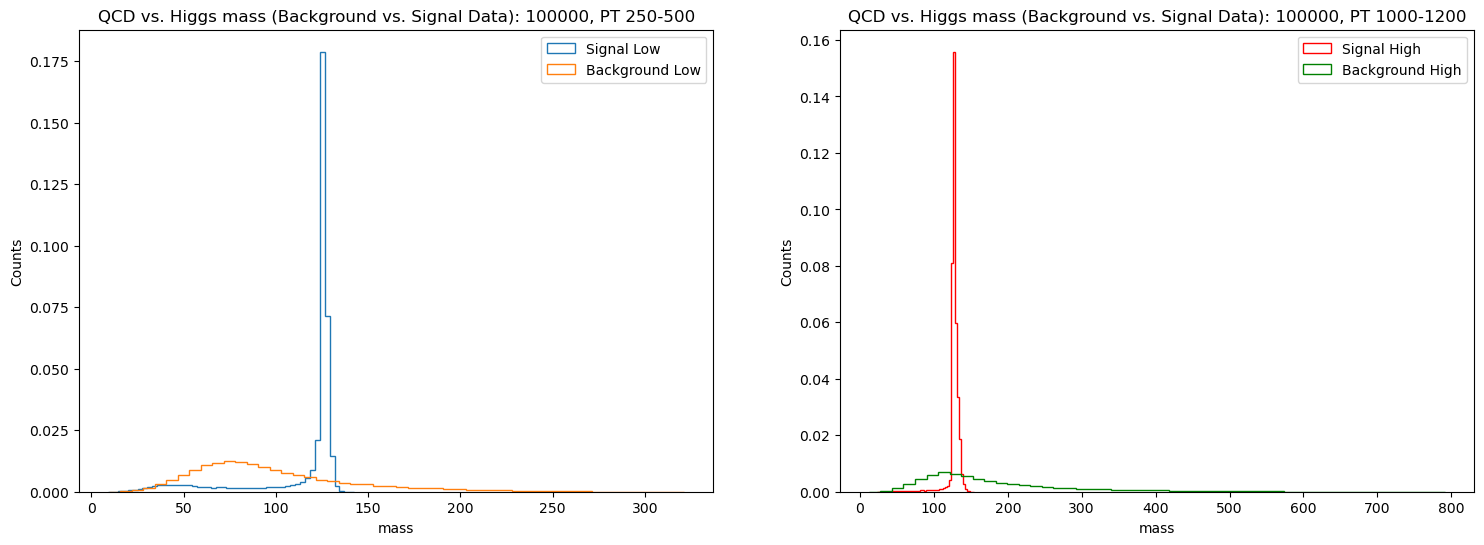

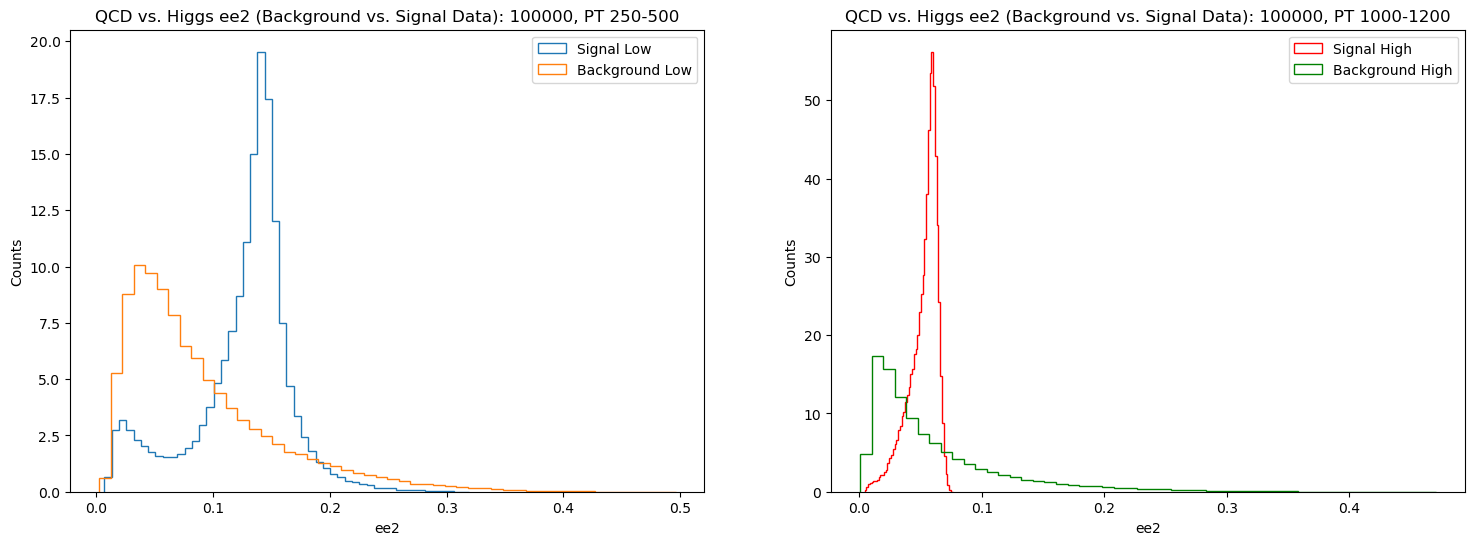

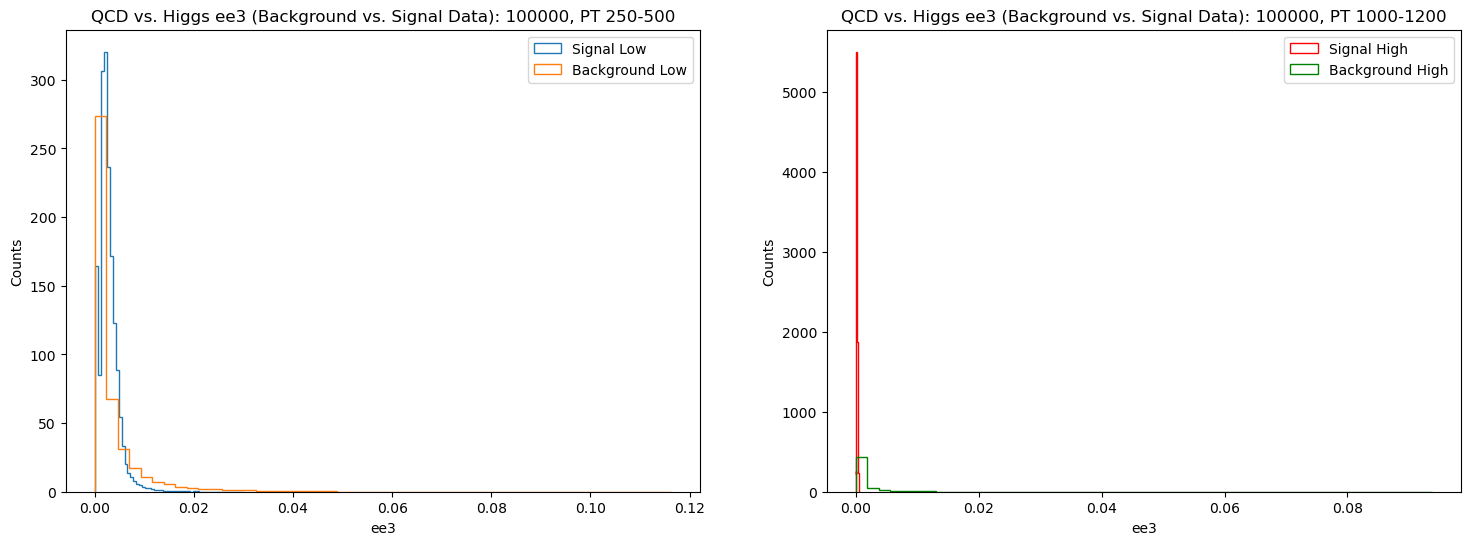

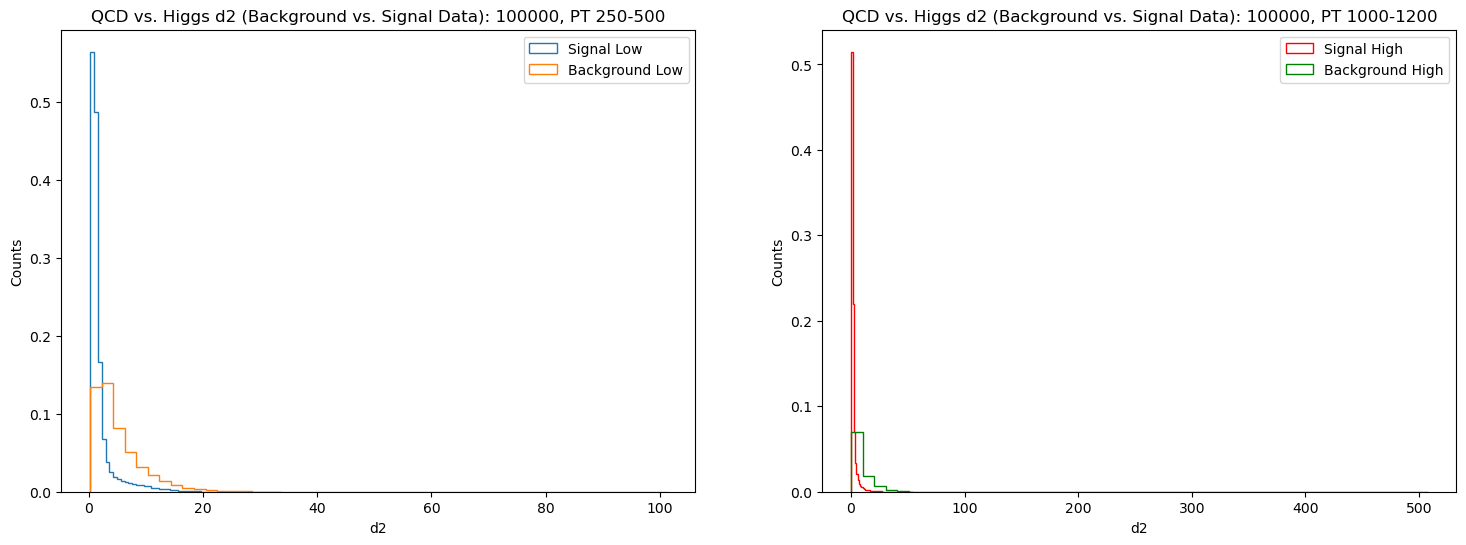

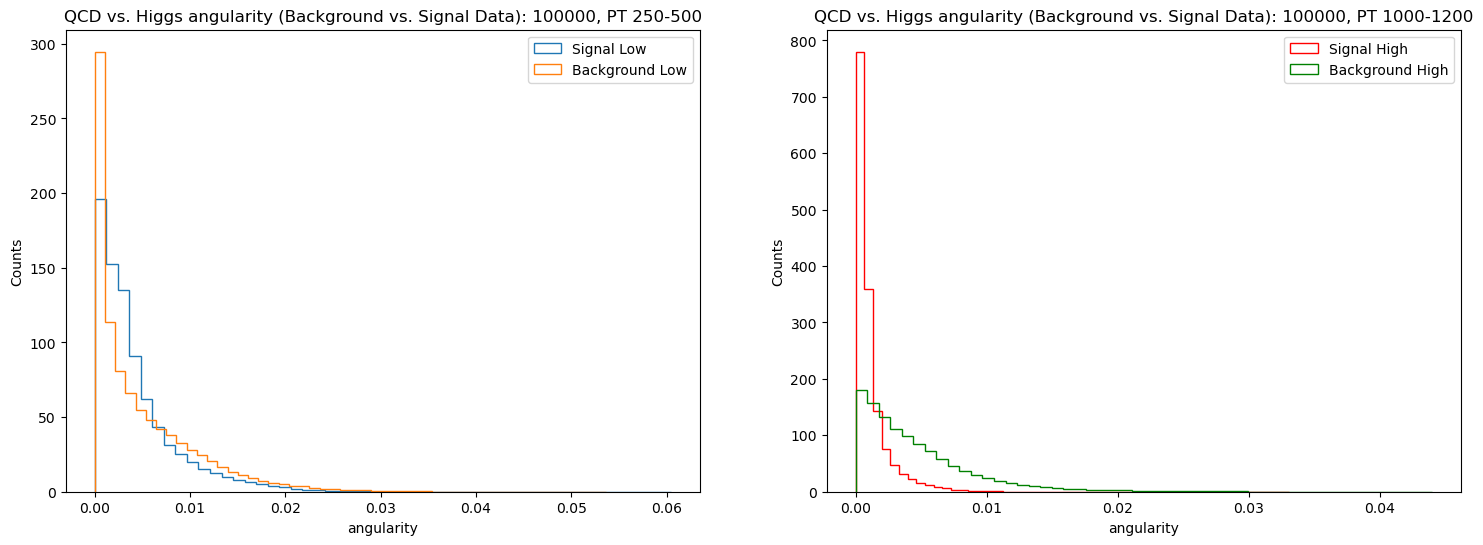

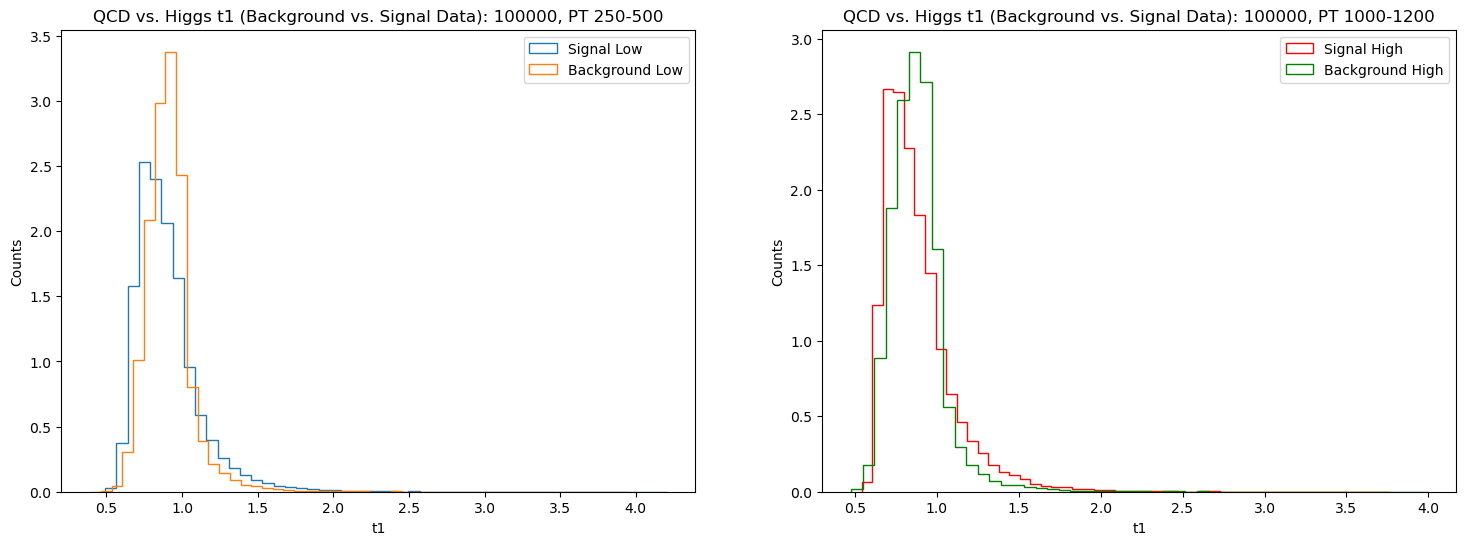

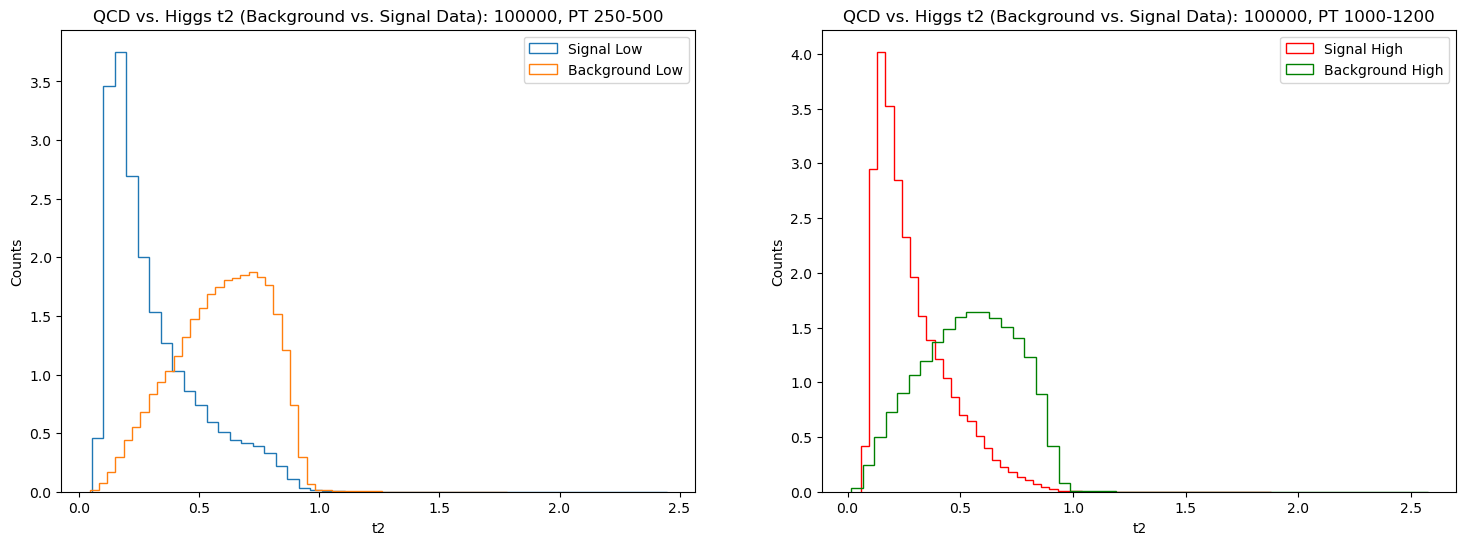

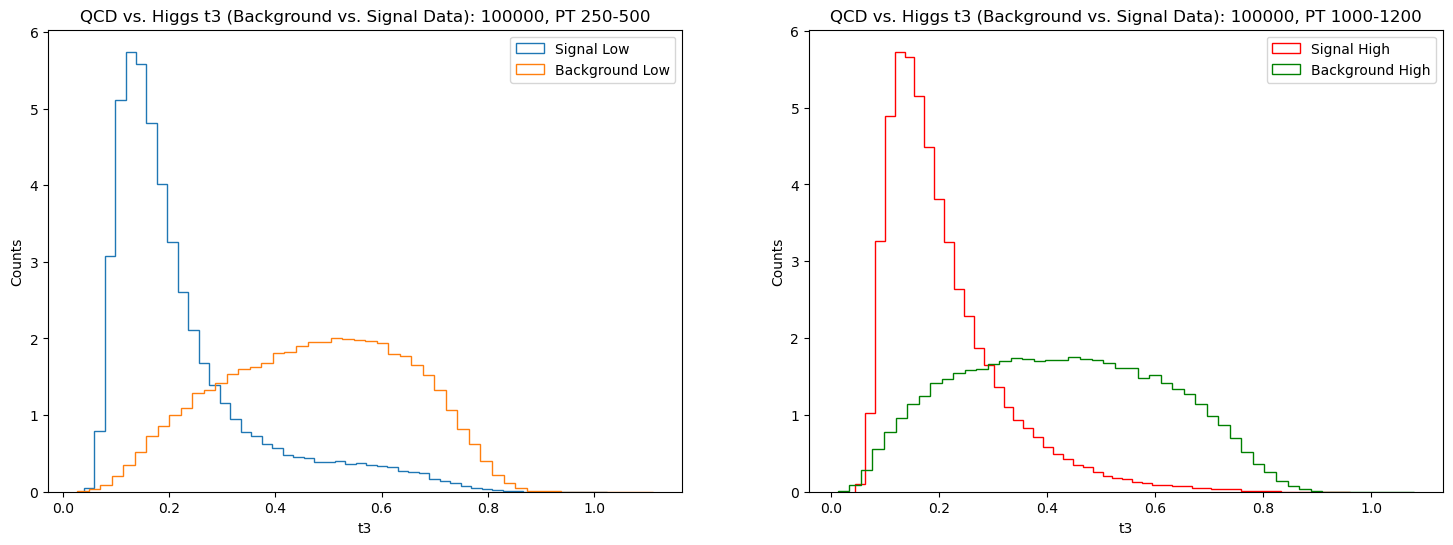

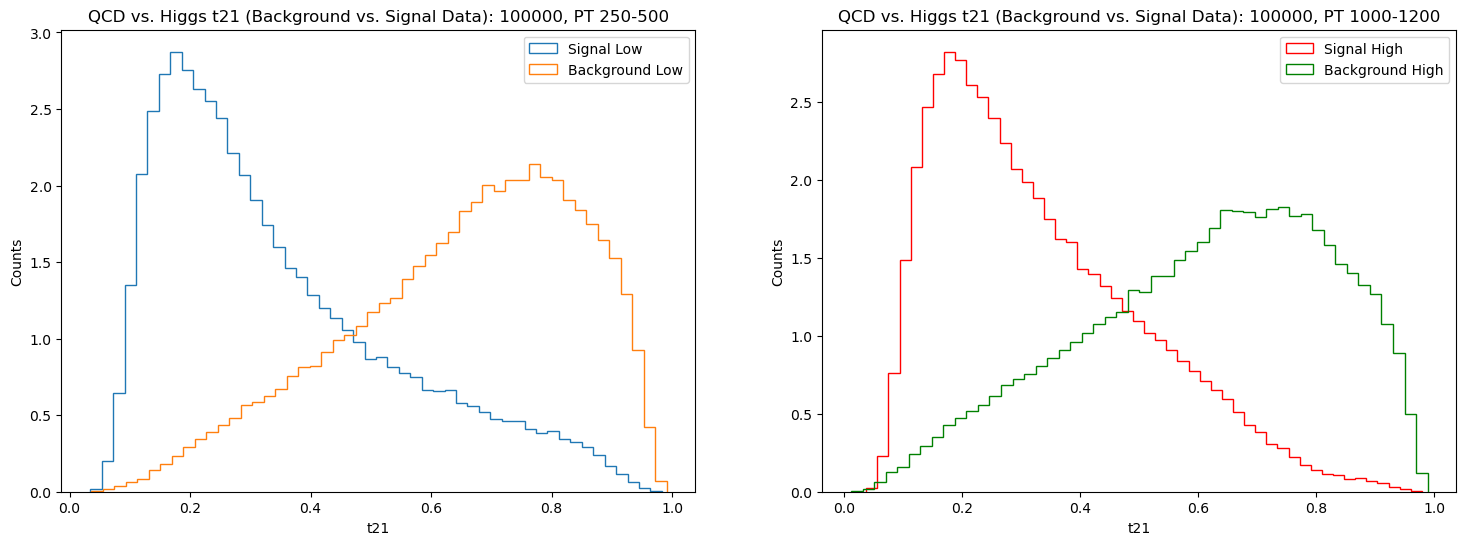

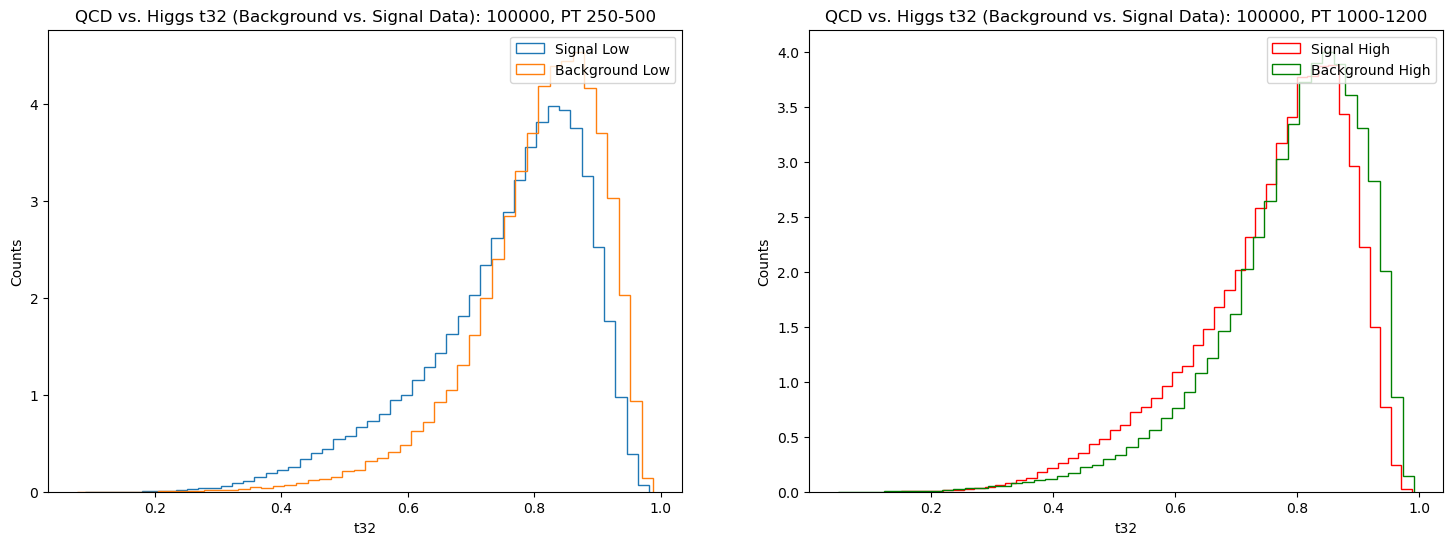

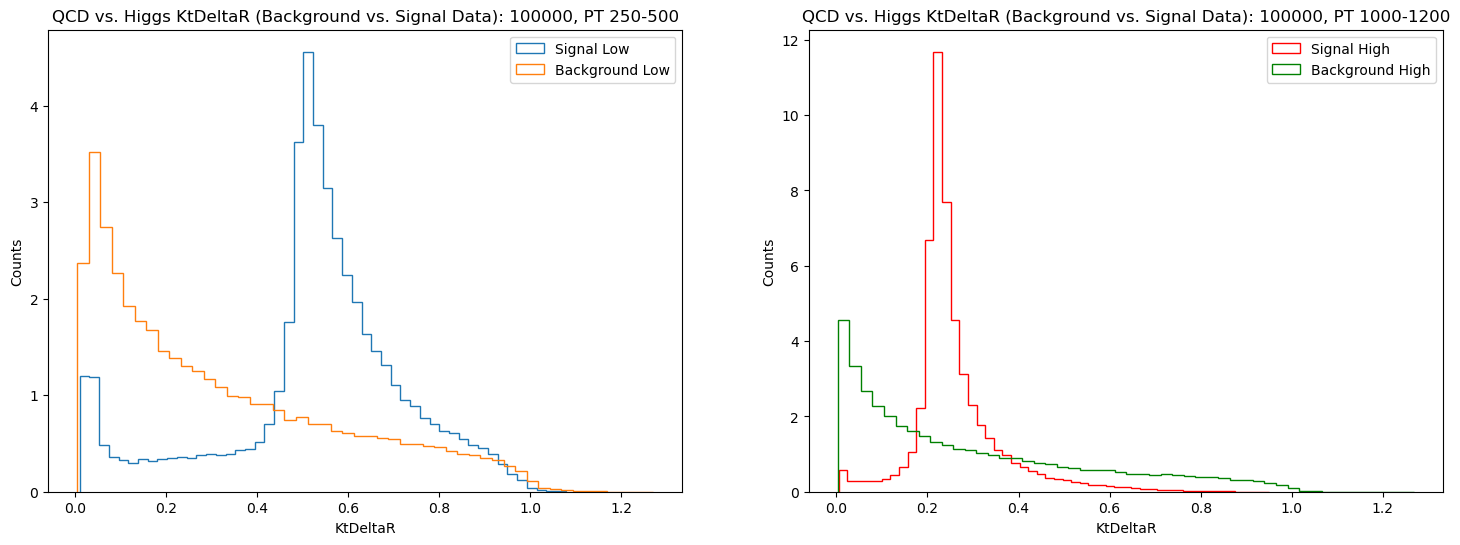

In [117]:
#Make some exploratory plots. Dictionary keys for the files are all the same, so we can just save them for one file, then loop over the
#remainder of the files in the same way we did for the first to more efficiently display everything without duplicating code.
for column in columns:
    cur_signal_data_low = signal_low_dict.get(column)
    cur_background_data_low = background_low_dict.get(column)

    cur_signal_data_high = signal_high_dict.get(column)
    cur_background_data_high = background_high_dict.get(column)

    #Background vs. signal for low pt.
    fig, (ax_low, ax_high) = plt.subplots(1,2, figsize=(18,6))
    ax_low.hist(cur_signal_data_low, density=True, histtype="step", bins=50, label="Signal Low")
    ax_low.hist(cur_background_data_low, density=True, histtype="step", bins=50, label="Background Low")
    ax_low.set_title("QCD vs. Higgs " + column + " (Background vs. Signal Data): 100000, PT 250-500")
    ax_low.set_xlabel(column)
    ax_low.set_ylabel("Counts")
    ax_low.legend()

    #Background vs. signal for high pt.
    ax_high.hist(cur_signal_data_high, density=True, histtype="step", bins=50, label="Signal High", color="red")
    ax_high.hist(cur_background_data_high, density=True, histtype="step", bins=50, label="Background High", color="green")
    ax_high.set_title("QCD vs. Higgs " + column + " (Background vs. Signal Data): 100000, PT 1000-1200")
    ax_high.set_xlabel(column)
    ax_high.set_ylabel("Counts")
    ax_high.legend()

Let us examine each set of plots above. Interpretations of each pair of these plots corresponding to a given column name are given in order (there are 14 sets of data total to be examined).

###### 1. PT (Transverse Momentum of Jet)

From the low transverse momentum plot, we can tell that the signal data is significantly more right-skewed than the background, which is somewhat right-skewed, but shows a pretty flat peak ~450 GeV. In the high $P_T$ plot, the data is more centered for both the signal and background. We can note, however, that the signal data has a significantly sharper peak than the background data, which again is a pretty rounded, almost semicircular centered distribution. As a result, the sharpness of the peak is a prominent distinguishing factor for our signal.

###### 2. Eta



###### 3. Phi



###### 4. Mass



###### 5. EE2



###### 6. EE3



###### 7. D2



###### 8. Angularity



###### 9. T1



###### 10. T2



###### 11. T3



###### 12. T21



###### 13. T32



###### 14. KtDeltaR

In [118]:
#TODO ^ Complete above analysis for each of the 14 plots.

# Part 2.2 - HERA Plots and Writeup

In [119]:
from pyuvdata import UVData

### Question a, b

Here, we download the data and find out how many unique antennas are in each of the three data files. In addition, we find how many antennas have visibilities associated with them in each of the three files.

In [120]:
uv = UVData()
# uv.read("Lab_5_Data/zen.2459122.34011.mini.sum.uvh5")
# hera_1 = uv.data_array

# Just read in the second data set.
uv.read("Lab_5_Data\zen.2459122.48015.mini.sum.uvh5")
hera_2 = uv.data_array

# uv.read("Lab_5_Data\zen.2459122.62018.mini.sum.uvh5")
# hera_3 = uv.data_array

antennas = uv.get_ants()
visible_antennas = np.unique(antennas)
num_unique_ants = len(visible_antennas)
num_ants = len(antennas)
print("We have the following unique antennas: ", antennas)
print("Number of antennas: ", num_ants)
print("Number of unique antennas: ", num_unique_ants, "\n")

We have the following unique antennas:  [  1   2  14  23  26  36  50  53  58  59  65  66  68  75  82  83  84  85
  90  91  93  98  99 100 102 104 117 118 120 122 124 135 140 141 142 176]
Number of antennas:  36
Number of unique antennas:  36 



The number of unique baselines given by uv.get_ants() is 1 less than the actual number, which is then $36+1=37$. So, there are 37 unique antennas.

### Question c

Based on the number you get from Question b, compute the number of baselines. Is that consistent with uv.data_array.shape[0], i.e. number of baselines*times? Explain the reason here. Note, the y axis on the example above is the number of time intervals.

The number of baselines is given by the formula $\frac{n(n-1)}{2} = \frac{37(36)}{2}$.

In [121]:
num_baselines = int(37*36/2)
print("Number of baselines: ", num_baselines)

print("Number of baselines given by baselines*times in data: ", hera_1.shape[0])

Number of baselines:  666
Number of baselines given by baselines*times in data:  13320


Our combinatoric result for the number of baselines (666) is consistent with the number given in the data since there are 20 time intervals for each baseline, yielding a total number of $20 \cdot 666 = 13320$ points, which is indeed what data_1.shape[0] yields above.

### Question d
Plot a waterfall plot of baseline (1, 2) for all the 20 time intervals.

In [122]:
#TODO ^ Parts d-himage.png
# Look at the antennas that are contained in the array:
print(sorted(uv.antenna_numbers))
print(len(sorted(uv.antenna_numbers)))
# Pick 2 sample antennas, and get data from that baseline. Note that to get the 'auto-correlations', you can do the 
# same thing, but set antenna1 and antenna2 to be the same value.
antenna1 = 140
antenna2 = 23
data_apair = uv.get_data(antenna1,antenna2)

[0, 1, 2, 11, 12, 13, 14, 23, 24, 25, 26, 36, 37, 38, 39, 44, 45, 46, 50, 51, 52, 53, 58, 59, 65, 66, 67, 68, 73, 75, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 116, 117, 118, 119, 120, 121, 122, 123, 124, 127, 128, 129, 130, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]
104


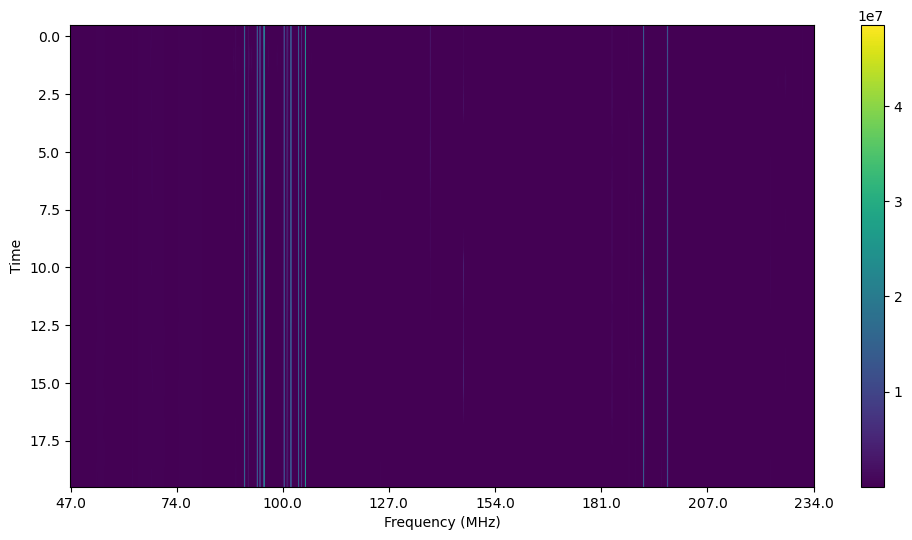

In [123]:
#Get data for antennas 1 and 2, then create a waterfall plot.
antenna1 = 1
antenna2 = 2
data_d = uv.get_data(antenna1,antenna2)
times_d = uv.get_times(antenna1,antenna2)

#Create a waterfall plot for the data from the baseline we extracted above.
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.abs(data_d),aspect='auto')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)

### Question e
Plot a waterfall plot of baseline (1, 2) for the first time interval.

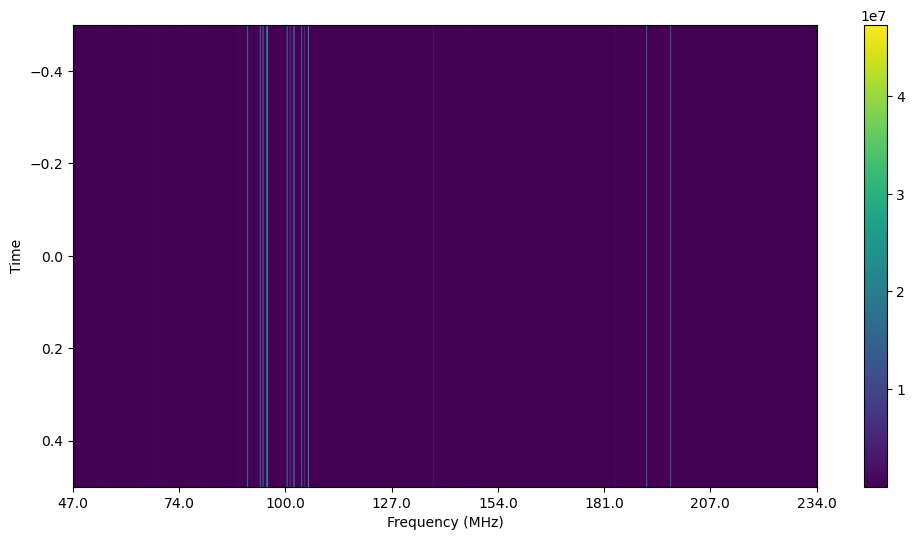

In [124]:
data_e = uv.get_data(1,2)

fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.abs(data_e[0:1]),aspect='auto')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)

### Question f

Plot a waterfall plot of baseline (1, 1) for the first time interval.

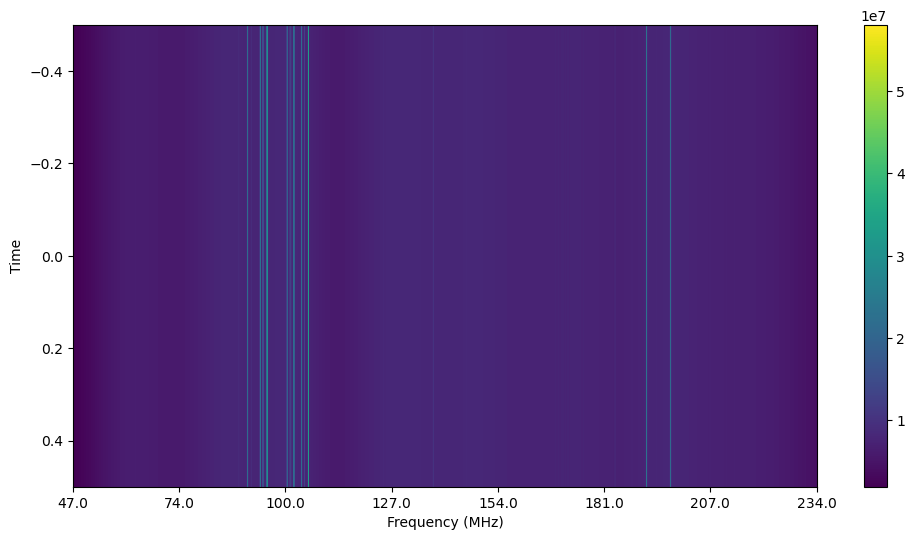

In [125]:
data_f = uv.get_data(1,1)

fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.abs(data_f[0:1]),aspect='auto')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)

In [126]:
# Store the number of frequencies we are analyzing (there are 1536 values).
num_freqs = len(freqs)

timeSum = np.zeros((20, num_freqs), dtype = np.complex_)
autocorrs = uv.antnums_to_baseline(visible_antennas, visible_antennas) 
count = 0

# Remove all auto-correlated pairs, then take the average of the reamining baseline data so we can plot it later.
for baseline in uv.get_baseline_nums():
    if not (baseline in autocorrs):       # Check if the baseline is not an auto-correlated pair.
        timeSum += uv.get_data(baseline)
        count +=1 

timeAv = timeSum/count

### Question f
Plot a waterfall plot of baseline (1, 1) for the first time interval.

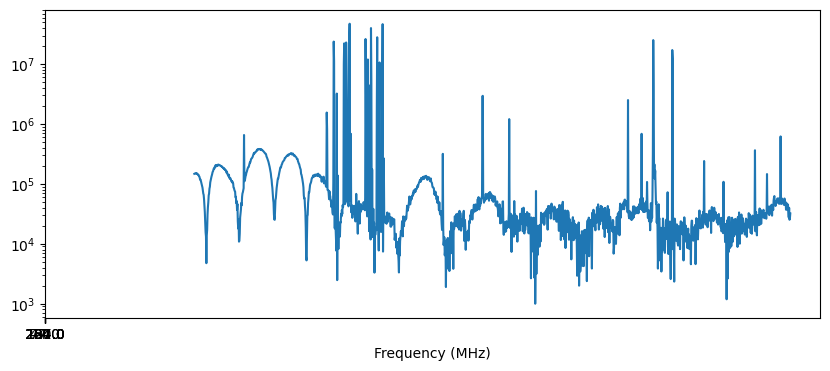

In [127]:
# Note: Waterfall plot doesn't really make sense for this part since it is an auto-correlation over a single time interval.
fig, axs = plt.subplots(1,1,figsize=(10,4))
plt.plot(uv.freq_array[0],  np.abs(data_d[0]))
plt.yscale('log')
axs.set_xlabel('Frequency (MHz)')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)

In [109]:
timeSum = np.zeros((20,num_freqs), dtype = np.complex_)
#Gets the autocorrelations between all antennas in visible_antennas.
autocorrs = uv.antnums_to_baseline(visible_antennas, visible_antennas) 
count = 0

for baseline in uv.get_baseline_nums():
    if not (baseline in autocorrs):            # checking if the baseline is not an auto-correlated pair
        timeSum += uv.get_data(baseline)
        count +=1

timeAv = timeSum/count

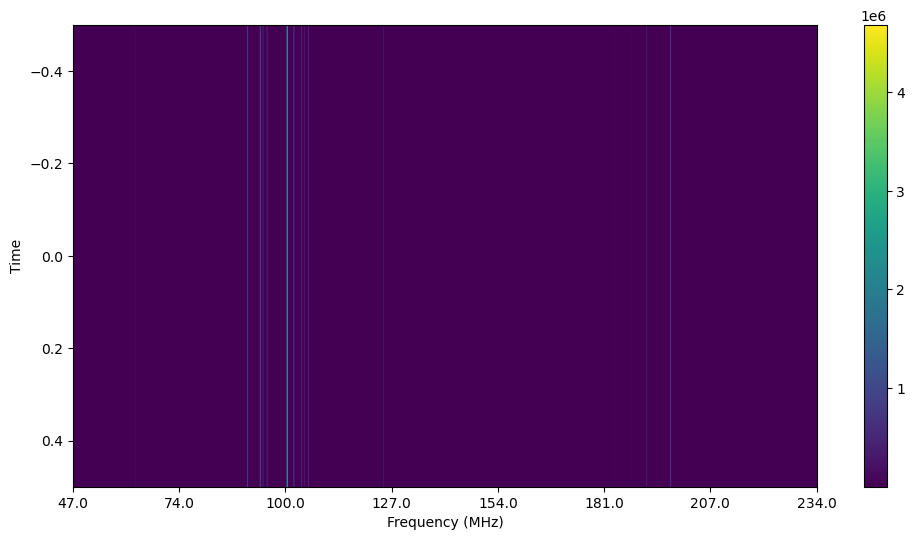

In [110]:
# Make a waterfall plot of the autocorrelation for baseline pair (1,1) over the last time interval.
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.abs(timeAv[19:20]),aspect='auto')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6   # Gets frequencies associated with each channel (in MHz, so convert to Hz)
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)

### Question G
For the first time interval, remove all the auto correlation pairs, and plot the waterfall plot of the average of the remaining pairs.

Text(0.5, 1.0, 'Averaged Baseline Data After Auto-Correlations Are Removed')

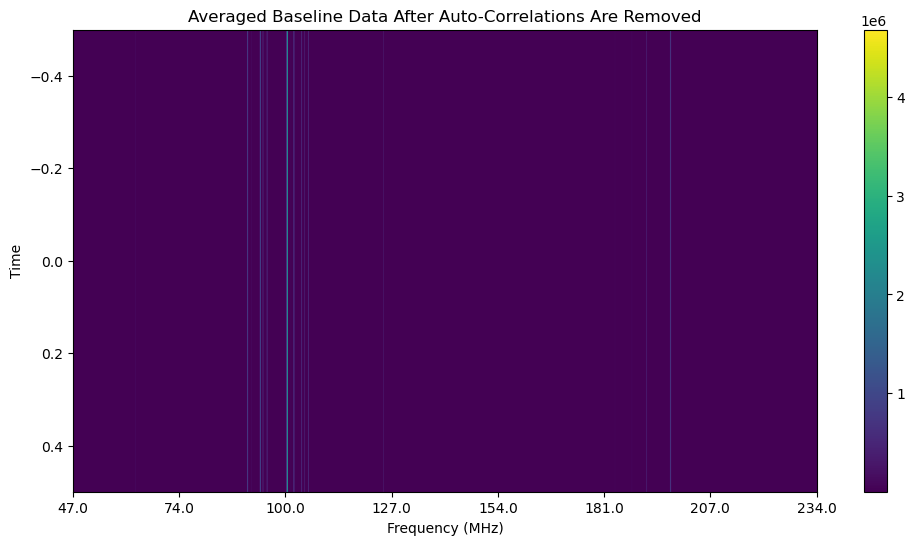

In [111]:
# Now, remove the auto-correlation data. Note that the remaining data shown in the waterfall plots has lower intensity (~10^7 vs. ~6*10^6).

fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.abs(timeAv[19:20]),aspect='auto')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
axs.set_title("Averaged Baseline Data After Auto-Correlations Are Removed")

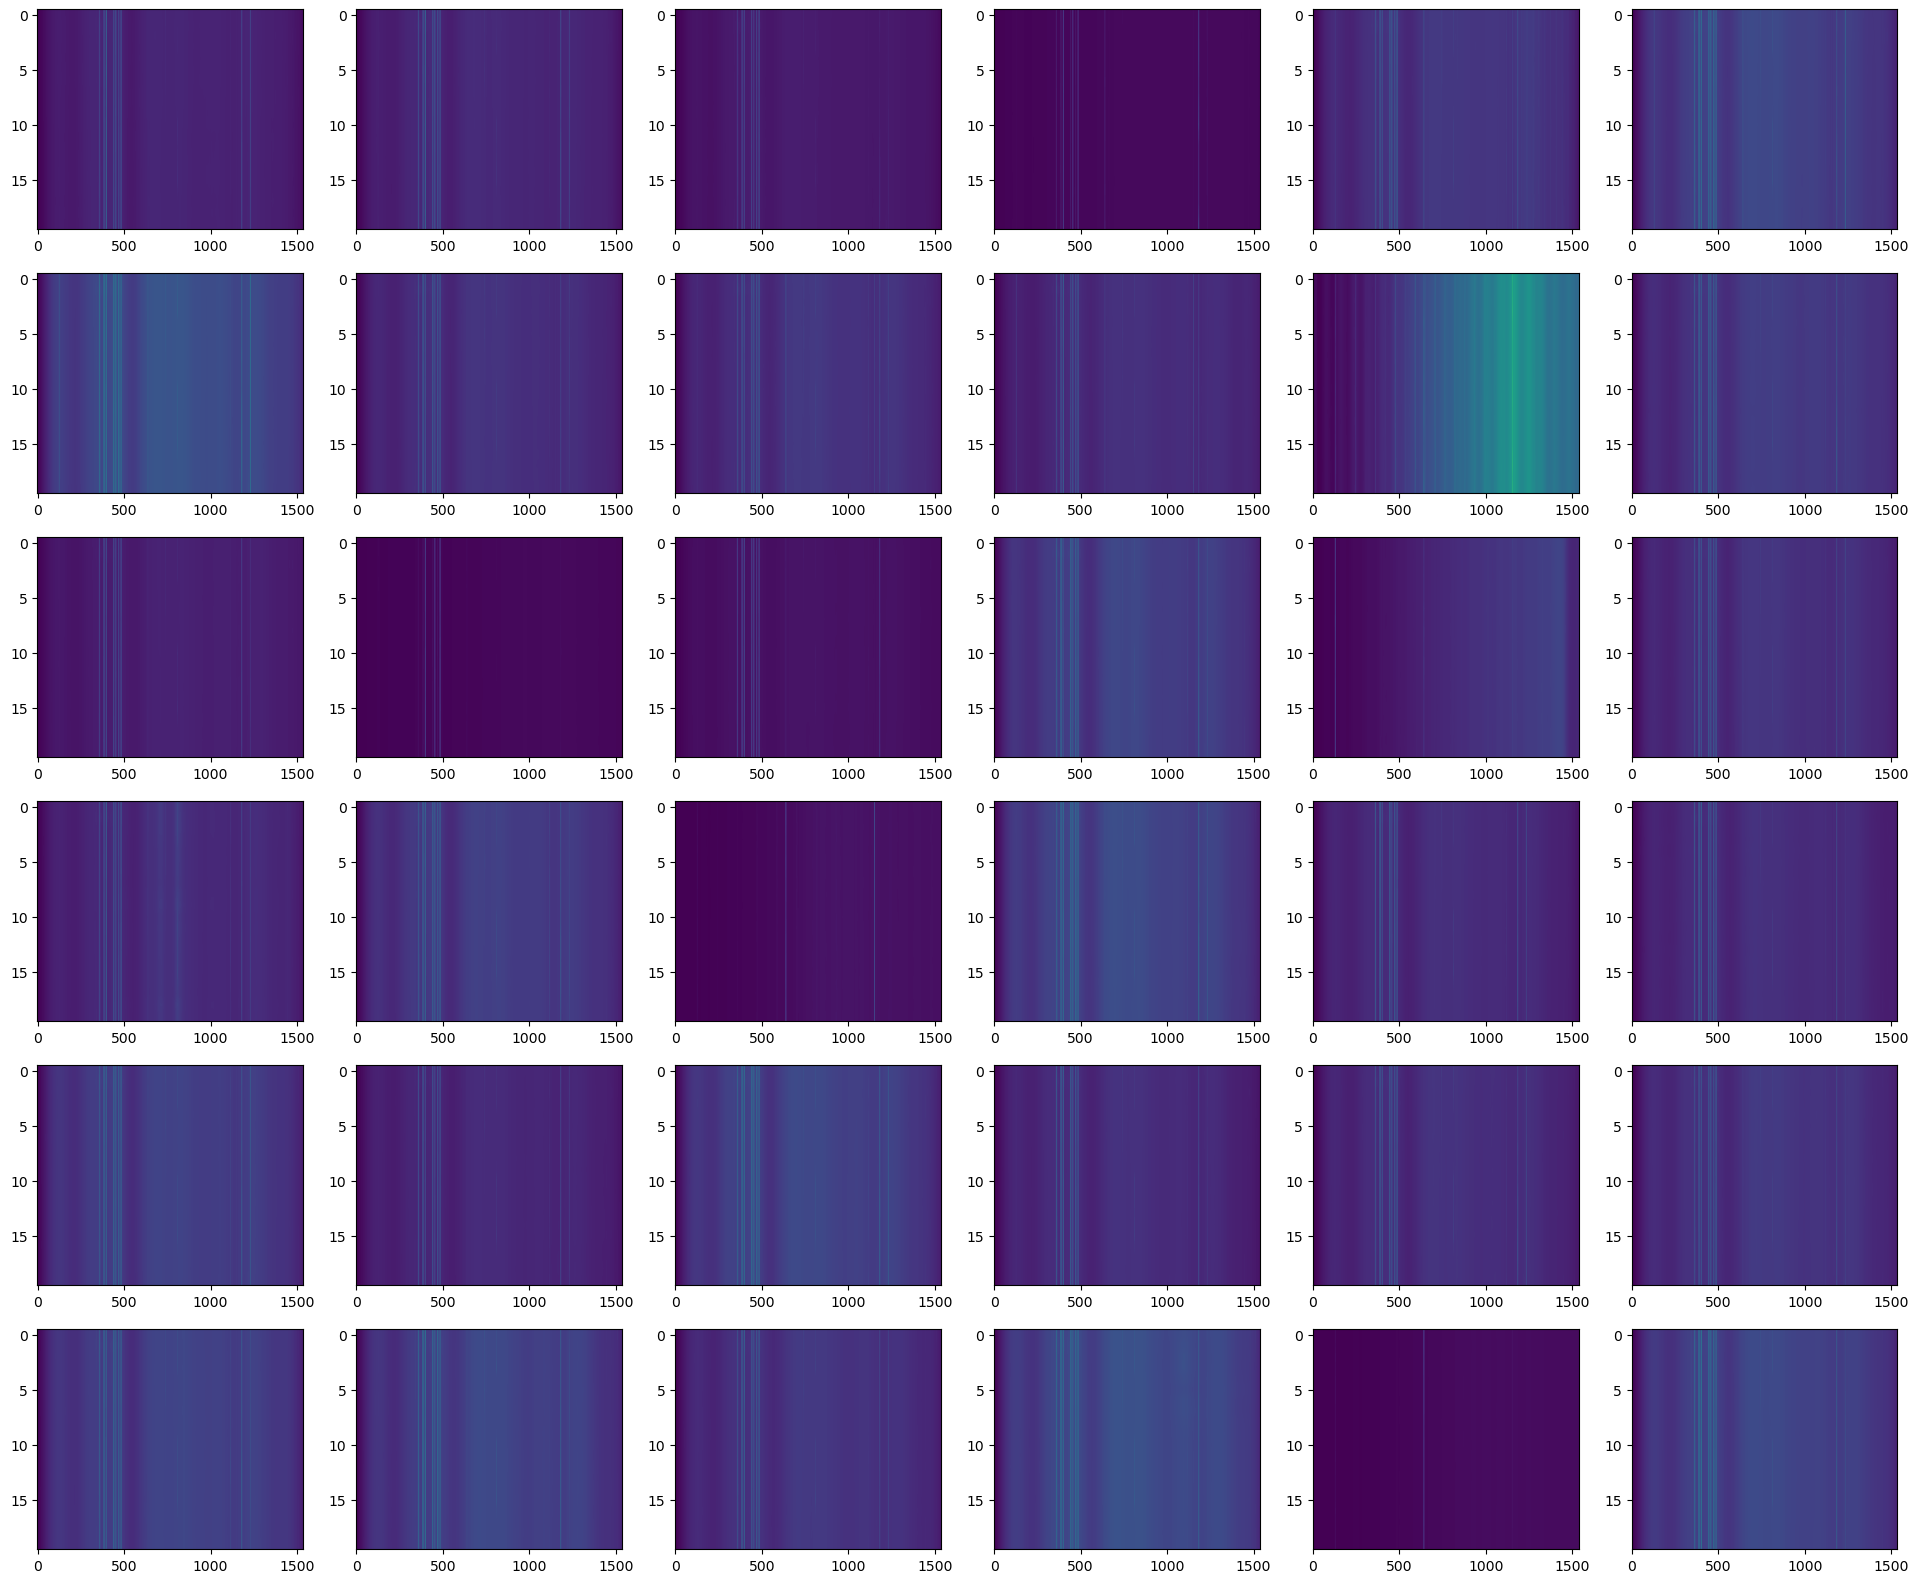

In [112]:
# Now, let's just look at some waterfall plots for various baseline pairs after having removed the auto-correlations.
count = 1

plt.figure(figsize = (24,20))

# Makes plots for each baseline pair (there are 36).
for baseline in autocorrs:
    data_h = uv.get_data(baseline)
    ax = plt.subplot(6, 6, count)
    ax.imshow(np.abs(data_h), aspect= 'auto')
    count += 1

### Question h

For the first time interval, remove all the auto-correlation pairs, and plot the average amplitude as a function of frequency. This is a 1d plot.

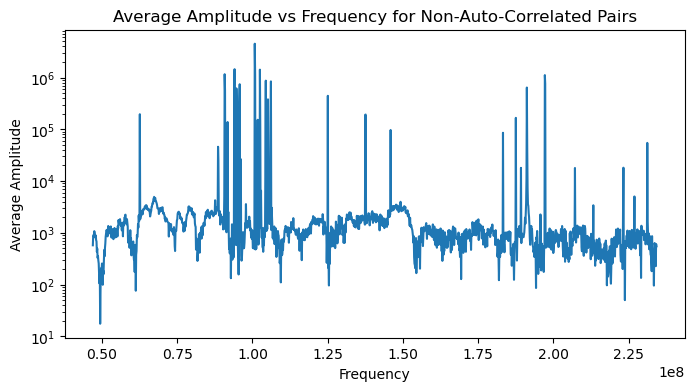

In [113]:
# Remove auto-correlated data and plot what remains as a function of amplitude vs. frequency.

plt.figure(figsize=(8,4))
plt.plot(uv.freq_array[0], np.abs(timeAv[0]))
plt.xlabel('Frequency')
plt.ylabel('Average Amplitude')
plt.title('Average Amplitude vs Frequency for Non-Auto-Correlated Pairs')
plt.yscale('log')